# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Menganalisa data inflasi merupakan hal yang penting karena inflasi sendiri dapat mempengaruhi banyak sektor ekonomi terutama terhadap harga barang di pasar secara keseluruhan. Individu juga akan bertindak untuk melindungi aset keuangan mereka dari kenaikan harga. Oleh karena itu, dilakukan scraping data inflasi untuk melakukan analisa bagaimana kondisi ekonomi Indonesia saat ini. 
Hipotesa :
- Apakah nilai inflasi tetap stabil ?

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [ ]:
pip install -r requirements.txt

In [23]:
import requests

url_get = requests.get('https://pusatdata.kontan.co.id/makroekonomi/inflasi')
url_get

<Response [200]>

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [24]:
url_get.content[1:500]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <link rel="shortcut icon" href="//assets.kontan.co.id/favicon.ico"/>\n    <link rel="stylesheet" href="https://asset.kontan.co.id/general/third-party/font-awesome-4.7.0/css/fo'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.


In [25]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().


Untuk melalukan ekstrak data upaya tidak perlu manual maka Kita perlu melihat lokasi data yang ingin kita ambil ada dibagian tab yang mana dengan melihat struktur pada HTML web tersebut. Perlu dicari key dari tag dan class nya yang membuat data tersebut unik.

In [26]:
table = soup.find('div',attrs={'class':'baris-scroll'})
print(table.prettify()[1:500])

div class="baris-scroll">
 <div class="tabel-body">
  <div class="kol-konten3-1">
   31/07/2024
  </div>
  <div class="kol-konten3-2">
   <div class="w-30-px txtright center-max">
    0,18
   </div>
  </div>
  <div class="kol-konten3-3">
   <div class="w-30-px txtright center-max">
    2,13
   </div>
  </div>
 </div>
 <div class="tabel-body">
  <div class="kol-konten3-1">
   30/06/2024
  </div>
  <div class="kol-konten3-2">
   <div class="w-30-px txtright center-max">
    0,08
   </div>
  </div


In [27]:
table.find_all('div',attrs={'class':'kol-konten3-1'})[:5]

[<div class="kol-konten3-1">31/07/2024</div>,
 <div class="kol-konten3-1">30/06/2024</div>,
 <div class="kol-konten3-1">31/05/2024</div>,
 <div class="kol-konten3-1">30/04/2024</div>,
 <div class="kol-konten3-1">31/03/2024</div>]

Next, we need to find the row length.

In [28]:
row=table.find_all('div',attrs={'class':'kol-konten3-1'})
row_length = len(row)
row_length 

#Menghitung jumlah row data yang akan discraping

50

Kemudian kita find_all() agar mendapatkan data dalam bentuk array menggunakan keyword data yang akan di scrap
find () boleh dilakukan beberapa kali sampai menemukan pola yang tepat sedangkan find_all() hanya dapat dilakukan 1x

In [29]:
table.find_all('div',attrs={'class':'kol-konten3-1'})[0].text

'31/07/2024'

Do the scrapping process here 

Melakukan scraping data dengan cara looping sebanyak jumlah baris yang ingin diambil. 
Lakukan looping untuk scraping masing-masing kolom. 
Pada case ini terdapat 2 kolom inflation MoM dan inflation YoY

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [30]:
temp = []  # Initiating a tuple

for i in range(0, row_length):

    #get period
    period=table.find_all('div',attrs={'class':'kol-konten3-1'})[i].text

    #get inflation mom
    inflation_mom=table.find_all('div',attrs={'class':'kol-konten3-2'})[i].text
    inflation_mom=inflation_mom.strip() #Remove excess white space

    #get inflation yoy
    inflation_yoy=table.find_all('div',attrs={'class':'kol-konten3-3'})[i].text
    inflation_yoy=inflation_yoy.strip() #Remove excess white space

    temp.append((period,inflation_mom,inflation_yoy))


temp=temp[::-1] #reverse urutan

In [31]:
temp

[('30/06/2020', '0.18', '1.96'),
 ('31/07/2020', '0.04', '1.54'),
 ('31/08/2020', '0.05', '1.32'),
 ('30/09/2020', '0,05', '1,42'),
 ('31/10/2020', '0,07', '1.44'),
 ('30/11/2020', '0,28', '1.59'),
 ('31/12/2020', '0,45', '1.68'),
 ('31/01/2021', '0,26', '1.55'),
 ('28/02/2021', '0,10', '1.38'),
 ('31/03/2021', '0,08', '1,37'),
 ('30/04/2021', '0,13', '1,42'),
 ('31/05/2021', '0,32', '1,68'),
 ('30/06/2021', '0,16', '1,33'),
 ('31/07/2021', '0,08', '1,52'),
 ('31/08/2021', '0,03', '1,59'),
 ('30/09/2021', '0,04', '1,60'),
 ('31/10/2021', '0,12', '1,66'),
 ('30/11/2021', '0,37', '1,75'),
 ('31/12/2021', '0,57', '1,87'),
 ('31/01/2022', '0,56', '2,18'),
 ('28/02/2022', '0,54', '2,06'),
 ('31/03/2022', '0.66', '2.64'),
 ('30/04/2022', '0,95', '3,47'),
 ('31/05/2022', '0,40', '3,55'),
 ('30/06/2022', '0.61', '4.35'),
 ('31/07/2022', '0,64', '4,94'),
 ('31/08/2022', '0,21', '4,69'),
 ('30/09/2022', '1,17', '5,95'),
 ('31/10/2022', '0,11', '5,71'),
 ('30/11/2022', '0,09', '5,42'),
 ('31/12/2

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

Data hasil scraping dimasukan kedalam dataframe untuk dilakukan analisa data

In [32]:
import pandas as pd

df = pd.DataFrame(temp,columns=('period','inflation_mom','inflation_yoy'))
df.head()

,period,inflation_mom,inflation_yoy
0,30/06/2020,0.18,1.96
1,31/07/2020,0.04,1.54
2,31/08/2020,0.05,1.32
3,30/09/2020,"0,05","1,42"
4,31/10/2020,"0,07",1.44


In [33]:
df.dtypes

period           object
inflation_mom    object
inflation_yoy    object
dtype: object

### Data Cleansing

Setelah melakukan pengecekan data value dan tipe data. Berikut data wrangling yang dilakukan :
- Mengubah tipe data inflation MoM menjadi string sementara untuk data cleansing mengubah ',' menjadi '.' kemudian mengubah kembali tipe datanya menjadi float64
- Mengubah tipe data inflation YoY menjadi string sementara untuk data cleansing mengubah ',' menjadi '.' kemudian mengubah kembali tipe datanya menjadi float64
- Mengubah tipe data periode menjadi datatime

In [34]:

df['inflation_mom']=df['inflation_mom'].astype('string')
df['inflation_mom']=df['inflation_mom'].str.replace(",",".")
df['inflation_mom']=df['inflation_mom'].astype('float64')

df['inflation_yoy']=df['inflation_yoy'].astype('string')
df['inflation_yoy']=df['inflation_yoy'].str.replace(",",".")
df['inflation_yoy']=df['inflation_yoy'].astype('float64')

df['period']=df['period'].astype('datetime64[ns]')

In [35]:
df.dtypes

period           datetime64[ns]
inflation_mom           float64
inflation_yoy           float64
dtype: object

In [36]:
df=df.set_index('period')
#membuat periode menjadi index

### Data Visualization

Selanjutnya melakukan data visualization dengan membuat plot timeseries inflation mom dan inflation yoy

<Axes: xlabel='period'>

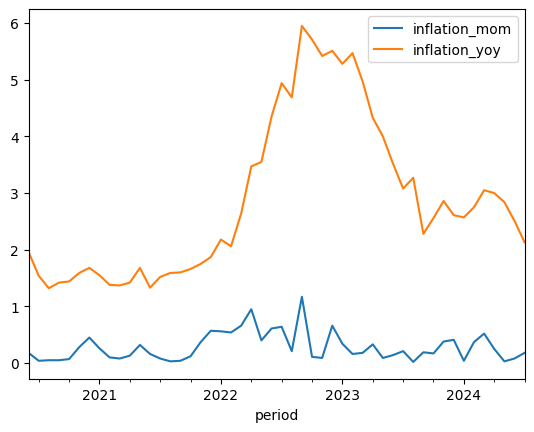

In [37]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

Sudah diakses pada local laptop saya dengan link : http://127.0.0.1:5000

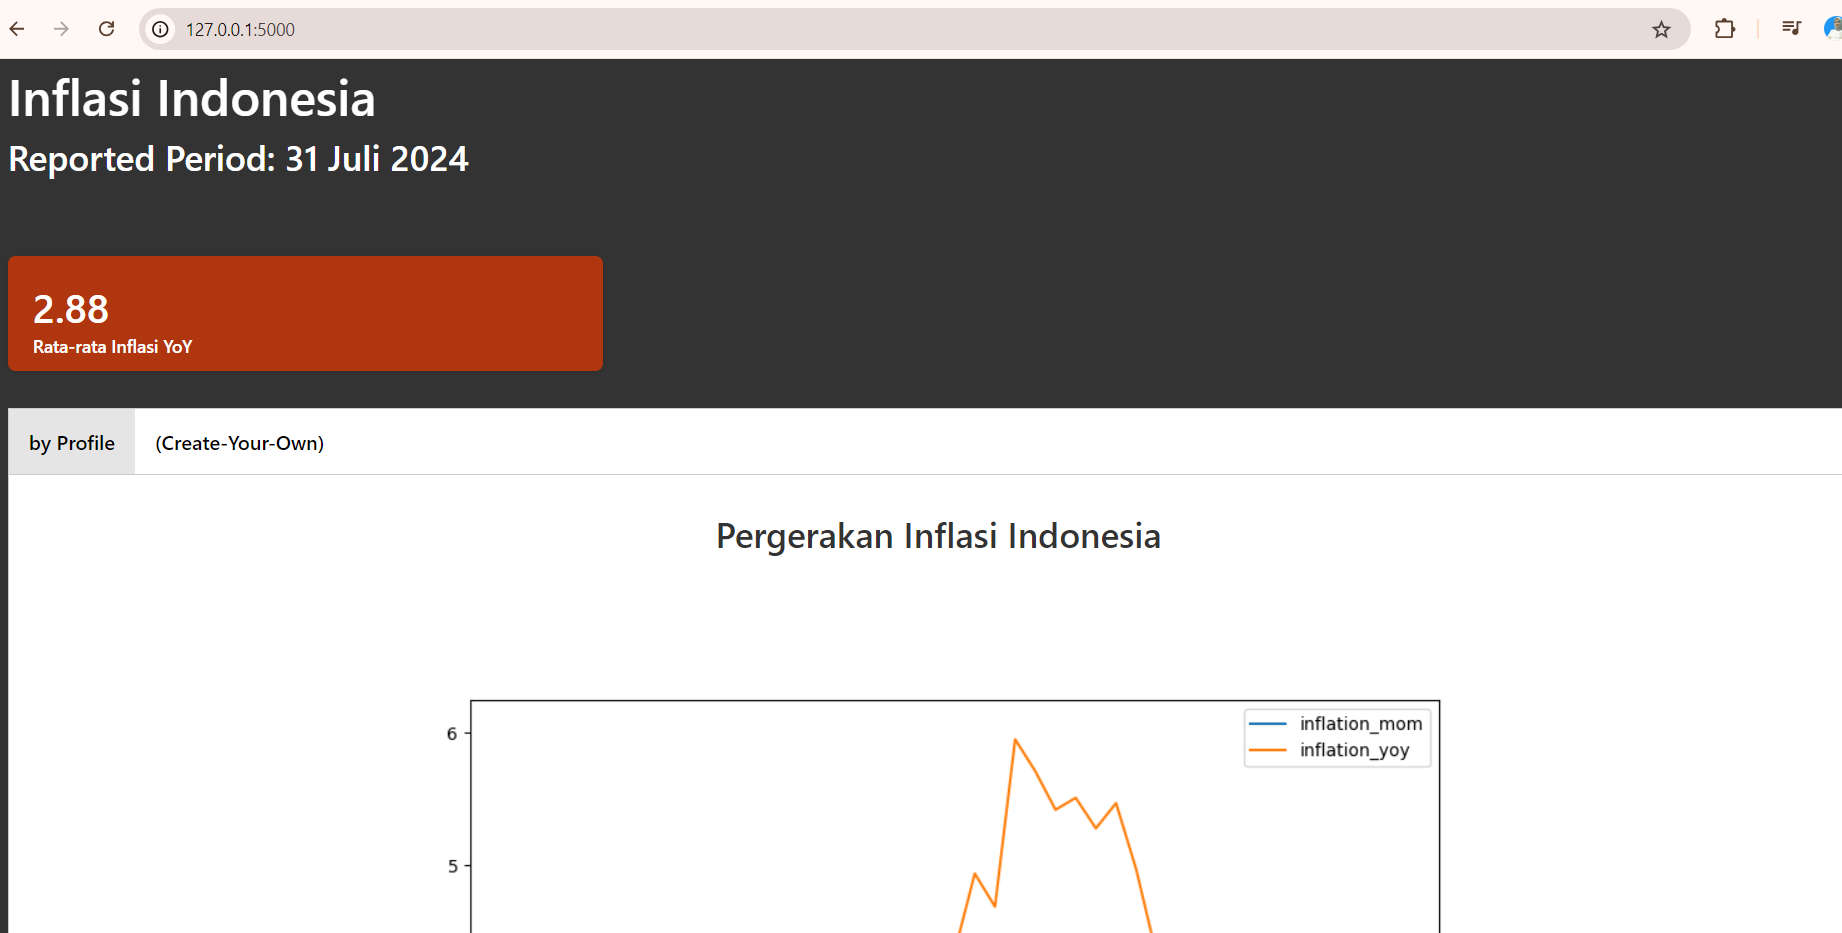

## Finishing This Notebook with Your Analysis and Conclusion

Langkah yang dilakukan :
- Melihat statistik data dengan melakukan describe dan 
- melihat boxplot dari masing masing atribut 

In [38]:
df.describe()

,inflation_mom,inflation_yoy
count,50.000000,50.000000
mean,0.281400,2.864400
std,0.250575,1.416168
min,0.020000,1.320000
25%,0.090000,1.615000
50%,0.185000,2.565000
75%,0.395000,3.542500
max,1.170000,5.950000


<Axes: >

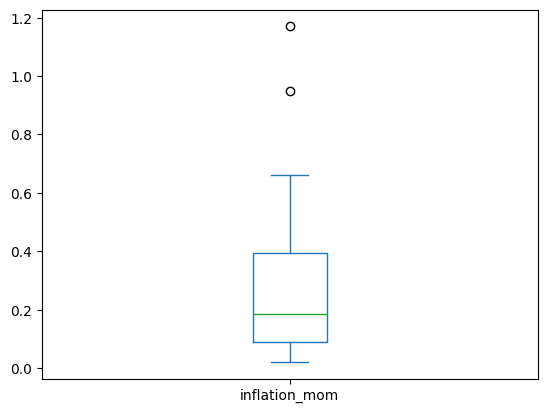

In [39]:
df['inflation_mom'].plot.box()

<Axes: >

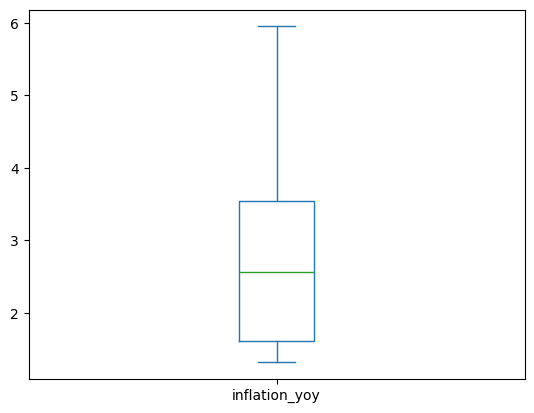

In [41]:
df['inflation_yoy'].plot.box()

## Analysis

Inflation MoM :
- Nilai rerata inflation MOM dari bulan Juni 2020 hingga Juli 2024 sebesar 0.281400	
- Terdapat nilai outlier pada data inflation MoM
- Pada bulan Juli 2024 nilai inflation MoM cenderung naik dibanding nilai inflation MoM bulan Juni 2024

Inflation YoY :
- Nilai rerata inflation YoY dari bulan Juni 2020 hingga Juli 2024 sebesar  2.864400
- Tidak terdapat nilai outlier pada data inflation MoM
- Pada bulan Juli 2024 nilai inflation YoY cenderung turun dibanding nilai inflation YoY bulan Juni 2024

Kesimpulan :
- Nilai inflasi bulan juli 2024 meningkat dibandingkan dengan juni 2024 dan nilai rasio kenaikannya lebih tinggi dibandingkan bulan sebelumnya
- Hipotesa ditolak karane nilai inflasi cenderung naik turun


### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

### Final Mission
- Scraping data harga harian, tanggal  web https://www.exchange-rates.org/history/IDR/USD/T
- Plot Pergerakan kurs

In [44]:
url_get2 = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')
url_get2

<Response [200]>

In [45]:
url_get2.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html;'

In [46]:
from bs4 import BeautifulSoup 

soup2 = BeautifulSoup(url_get2.content,"html.parser")
print(type(soup2))

<class 'bs4.BeautifulSoup'>


In [53]:
table2 = soup2.find('table',attrs={'class':'history-rates-data'})
print(table2.prettify())

<table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2024-08-30">
     <span class="nowrap">
      2024-8-30
     </span>
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2024-08-30">
     <span class="nowrap">
      2024-8-30
     </span>
    </a>
   </td>
   <td>
    <span class="w">
     <span class="nowrap">
      1 USD =
     </span>
     <span class="nowrap">
      15,532 IDR
     </span>
    </span>
    <span class="n">
     <span class="nowrap">
      1 USD =
     </span>
     <span class="nowrap">
      15,532 IDR
     </span>
    </span>
   </td>
  </tr>
  <tr class="odd">
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2024-08-29">
     <span class="nowrap">
      2024-8-29
     </span>
    </a>

In [59]:
table2.find_all('tr')[:5]

[<tr>
 <th class="ltr-bidi-fix">Date</th>
 <th class="ltr-bidi-fix">US Dollar to Indonesian Rupiah</th>
 </tr>,
 <tr>
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2024-08-30"><span class="nowrap">2024-8-30</span></a>
 <a class="n" href="/exchange-rate-history/usd-idr-2024-08-30"><span class="nowrap">2024-8-30</span></a>
 </td>
 <td>
 <span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">15,532 IDR</span></span>
 <span class="n"><span class="nowrap">1 USD =</span> <span class="nowrap">15,532 IDR</span></span>
 </td>
 </tr>,
 <tr class="odd">
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2024-08-29"><span class="nowrap">2024-8-29</span></a>
 <a class="n" href="/exchange-rate-history/usd-idr-2024-08-29"><span class="nowrap">2024-8-29</span></a>
 </td>
 <td>
 <span class="w"><span class="nowrap">1 USD =</span> <span class="nowrap">15,466 IDR</span></span>
 <span class="n"><span class="nowrap">1 USD =</span> <span class="nowrap">15,466 IDR</span></s

In [74]:
#Cari keyword untuk lokasi data tanggal

row2=table2.find_all('a',attrs={'class':'w'})
row_length2 = len(row2)
row_length2

130

In [75]:
#Cari keyword untuk harga harian

row3=table2.find_all('span',attrs={'class':'w'})
row_length3 = len(row3)
row_length3

130

In [78]:
try = table2.find_all('span',attrs={'class':'w'})[1].text

'1 USD = 15,466 IDR'

In [82]:
temp2 = []  # Initiating a tuple

for i in range(0, row_length2):

    #get tanggal
    tanggal=table2.find_all('a',attrs={'class':'w'})[i].text

    #get inflation mom
    kurs=table2.find_all('span',attrs={'class':'w'})[i].text

    temp2.append((tanggal,kurs))


temp2=temp2[::-1] #reverse urutan